# Power Generation
The following dataset (*TERNA_SUNSET_ENERGY_BALANCE*) make reference to the hourly production from renewable energy sources: water, geothermal, wind and solar power.
The energy required on the national grid to meet net internal consumption ('total load') is equal to the sum of the net electricity produced and the electricity imported from abroad, minus the energy absorbed by pumping and the energy exported.


In [1]:
import sys
import os
import pandas as pd

# Add the source directory to the system path
sys.path.append(os.path.abspath('../../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib
# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_ENERGY_BALANCE" 
power = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
power = power.sort_values(by='ORAINI')

power

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,ORAINI,FLOWDATE,FLOWHOUR,ENERGY_BALANCE_GWh,ENERGY_SOURCE,LOADTIME
0,201901010000,20190101,1,0.67,Geothermal,2024-10-17 11:16:54.393
1,201901010000,20190101,1,2.06,Hydro,2024-10-17 11:16:54.393
2,201901010000,20190101,1,1.44,Net Foreign Exchange,2024-10-17 11:16:54.393
3,201901010000,20190101,1,0.00,Photovoltaic,2024-10-17 11:16:54.393
4,201901010000,20190101,1,-0.03,Pumping-consumption,2024-10-17 11:16:54.393
...,...,...,...,...,...,...
406218,202410162300,20241016,24,6.66,Net Foreign Exchange,2024-10-17 11:40:08.567
406219,202410162300,20241016,24,0.00,Photovoltaic,2024-10-17 11:40:08.567
406220,202410162300,20241016,24,-0.04,Pumping-consumption,2024-10-17 11:40:08.567
406221,202410162300,20241016,24,3.01,Self-consumption,2024-10-17 11:40:08.567


In [2]:
# Filter the DataFrame for the relevant columns and rows
power = power[['ENERGY_BALANCE_GWh', 'ORAINI', 'ENERGY_SOURCE']]
# Convert ORAINI to datetime using the correct method
power['ORAINI'] = pd.to_datetime(power['ORAINI'], format='%Y%m%d%H%M')
power.set_index('ORAINI', inplace=True)

power

C:\Users\samueledelia\AppData\Local\Temp\3\ipykernel_3372\3394202153.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power['ORAINI'] = pd.to_datetime(power['ORAINI'], format='%Y%m%d%H%M')


,ENERGY_BALANCE_GWh,ENERGY_SOURCE
ORAINI,,
2019-01-01 00:00:00,0.67,Geothermal
2019-01-01 00:00:00,2.06,Hydro
2019-01-01 00:00:00,1.44,Net Foreign Exchange
2019-01-01 00:00:00,0.00,Photovoltaic
2019-01-01 00:00:00,-0.03,Pumping-consumption
...,...,...
2024-10-16 23:00:00,6.66,Net Foreign Exchange
2024-10-16 23:00:00,0.00,Photovoltaic
2024-10-16 23:00:00,-0.04,Pumping-consumption


In [3]:
# Get unique labels of the ENERGY_SOURCE
unique_energy_sources = power['ENERGY_SOURCE'].unique()

# Convert to list if needed
energy_sources_list = unique_energy_sources.tolist()

# Display the unique energy sources
print(energy_sources_list)

['Geothermal', 'Hydro', 'Net Foreign Exchange', 'Photovoltaic', 'Pumping-consumption', 'Self-consumption', 'Thermal', 'Wind']


In [4]:
thermo = utils.filter_and_rename_energy_source(power, 'Thermal', 'THERMO_GWH')
wind = utils.filter_and_rename_energy_source(power, 'Wind', 'WIND_GWH')
solar = utils.filter_and_rename_energy_source(power, 'Photovoltaic', 'SOLAR_GWH')
hydro = utils.filter_and_rename_energy_source(power, 'Hydro', 'HYDRO_GWH')
geothermal = utils.filter_and_rename_energy_source(power, 'Geothermal', 'GEO_GWH')
forex = utils.filter_and_rename_energy_source(power, 'Net Foreign Exchange', 'FOREX_GWH')

### Thermal production

In [5]:
thermo

,THERMO_GWH
ORAINI,
2019-01-01 00:00:00,13.35
2019-01-01 01:00:00,13.09
2019-01-01 02:00:00,12.42
2019-01-01 03:00:00,10.70
2019-01-01 04:00:00,10.39
...,...
2024-10-16 19:00:00,21.83
2024-10-16 20:00:00,20.26
2024-10-16 21:00:00,17.35


In [6]:
print("Macro-scale descriptive stats: THERMO")
print(thermo["THERMO_GWH"].describe(),"\n")

Macro-scale descriptive stats: THERMO
count    50778.000000
mean        17.041750
std          5.758285
min          3.990000
25%         12.560000
50%         16.560000
75%         21.260000
max         35.280000
Name: THERMO_GWH, dtype: float64 



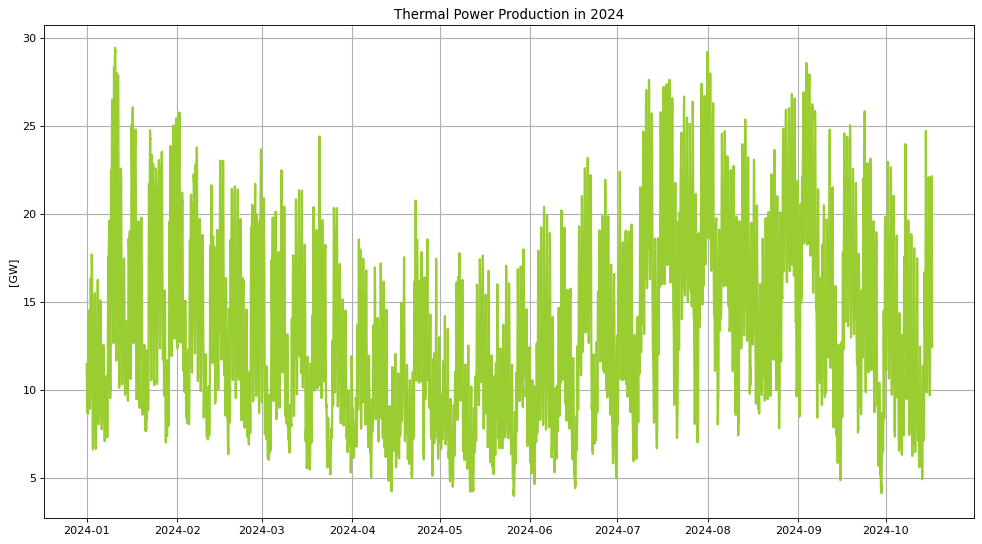

In [7]:
import matplotlib.pyplot as plt

DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(thermo["THERMO_GWH"].loc["2024"], linewidth=2, color = "yellowgreen") 

ax.set_title("Thermal Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

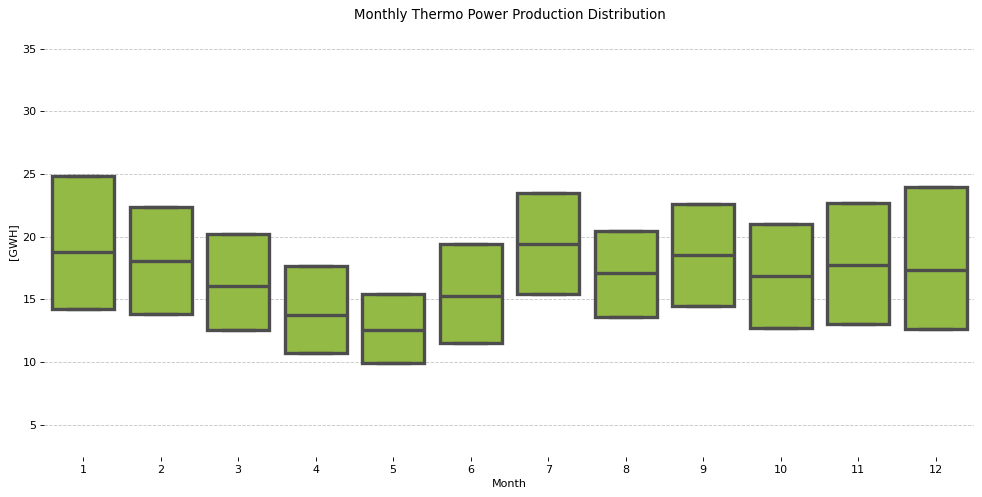

In [8]:
import seaborn as sns

thermo_copy = thermo.copy()
thermo_copy.loc[:, 'hour'] = thermo_copy.index.hour
thermo_copy.loc[:, 'month'] = thermo_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=thermo_copy, x='month', y='THERMO_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = "yellowgreen")
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Thermo Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5> Trends in thermo </h5>
I use a rolling window of six months

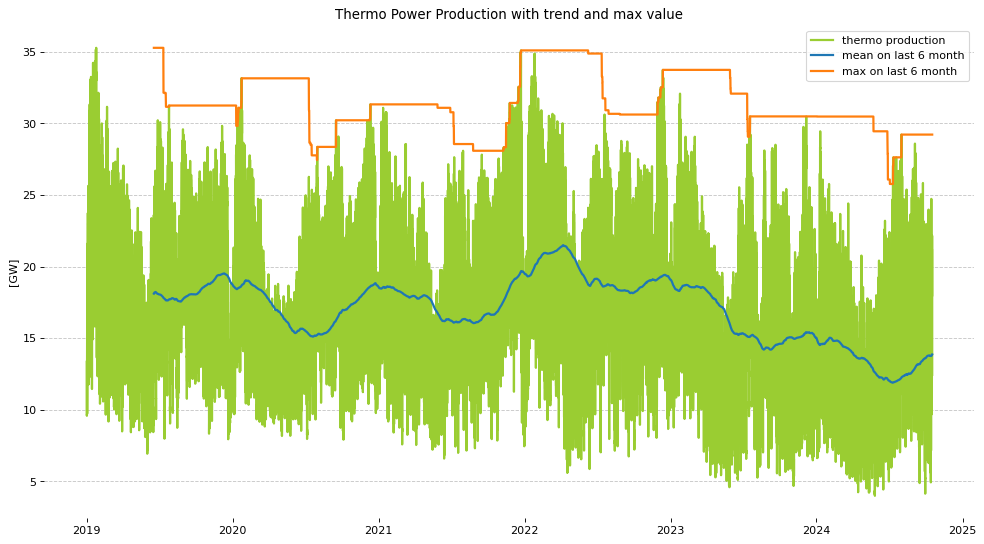

In [30]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(thermo["THERMO_GWH"], linewidth=2, label = 'thermo production', color = "yellowgreen") 
ax.plot(thermo["THERMO_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(thermo["THERMO_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Thermo Power Production with trend and max value"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Wind production

In [10]:
print("Macro-scale descriptive stats: WIND")
print(wind["WIND_GWH"].describe(),"\n")

Macro-scale descriptive stats: WIND
count    50778.000000
mean         2.367094
std          1.731389
min          0.020000
25%          0.950000
50%          1.930000
75%          3.470000
max          8.790000
Name: WIND_GWH, dtype: float64 



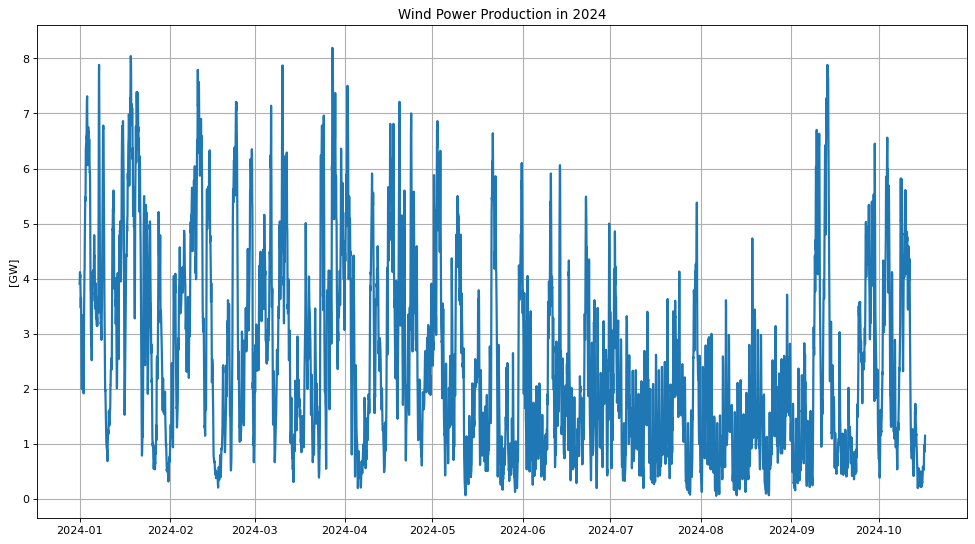

In [11]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind["WIND_GWH"].loc["2024"], linewidth=2) 

ax.set_title("Wind Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

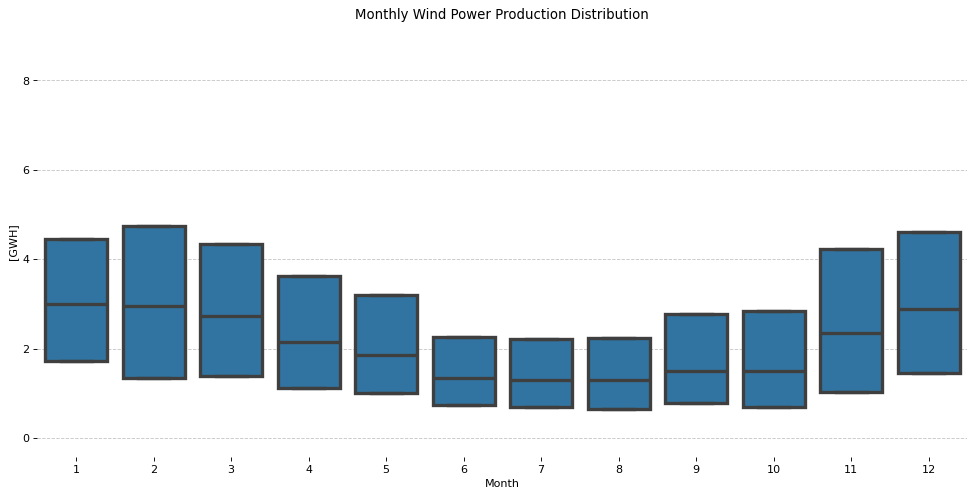

In [12]:
wind_copy = wind.copy()
wind_copy.loc[:, 'hour'] = wind_copy.index.hour
wind_copy.loc[:, 'month'] = wind_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=wind_copy, x='month', y='WIND_GWH', fliersize=0, whis=0, linewidth=3, ax=ax)
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Wind Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5>Trends in wind</h5>

I use a rolling window of six months

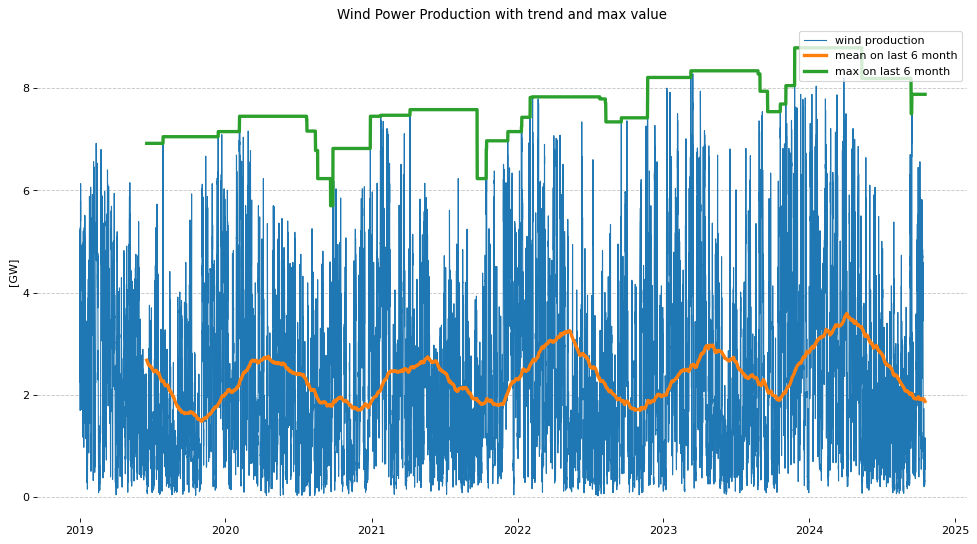

In [13]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(wind["WIND_GWH"], linewidth=1, label = 'wind production') 
ax.plot(wind["WIND_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=3, label = 'mean on last 6 month') 
ax.plot(wind["WIND_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=3, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Wind Power Production with trend and max value"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Hydro

In [14]:
hydro

,HYDRO_GWH
ORAINI,
2019-01-01 00:00:00,2.06
2019-01-01 01:00:00,1.75
2019-01-01 02:00:00,1.67
2019-01-01 03:00:00,1.48
2019-01-01 04:00:00,1.48
...,...
2024-10-16 19:00:00,9.78
2024-10-16 20:00:00,8.35
2024-10-16 21:00:00,8.20


In [15]:
print("Macro-scale descriptive stats: HYDRO")
print(hydro["HYDRO_GWH"].describe(),"\n")

Macro-scale descriptive stats: HYDRO
count    50778.000000
mean         5.010922
std          2.549642
min          0.610000
25%          2.920000
50%          4.680000
75%          6.800000
max         14.470000
Name: HYDRO_GWH, dtype: float64 



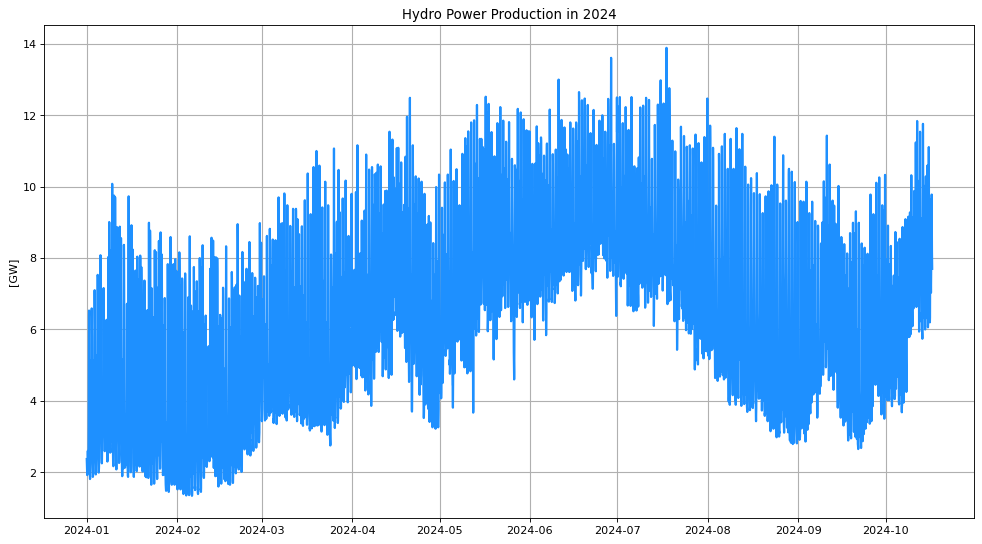

In [16]:
DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(hydro["HYDRO_GWH"].loc["2024"], linewidth=2, color = 'dodgerblue') 

ax.set_title("Hydro Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

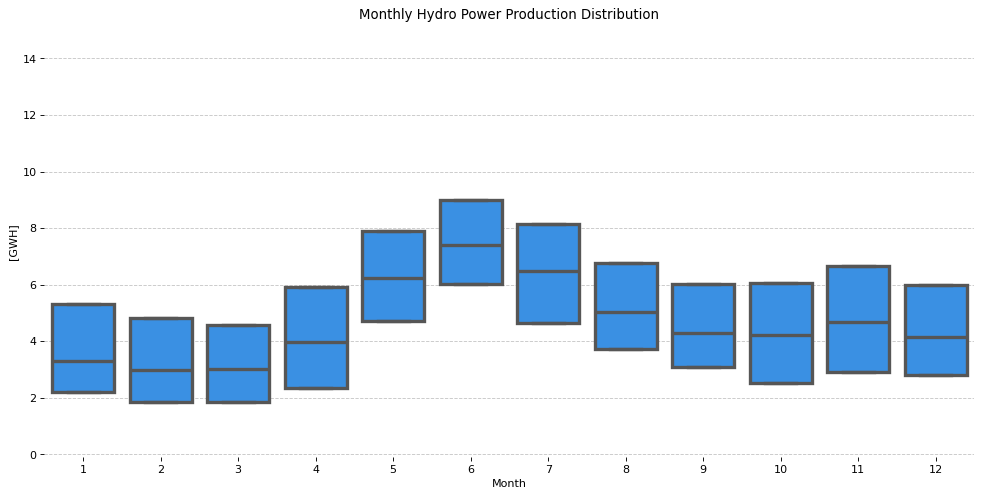

In [17]:
hydro_copy = hydro.copy()
hydro_copy.loc[:, 'hour'] = hydro_copy.index.hour
hydro_copy.loc[:, 'month'] = hydro_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=hydro_copy, x='month', y='HYDRO_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = 'dodgerblue')
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Hydro Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5>Trends in wind</h5>

I use a rolling window of six months

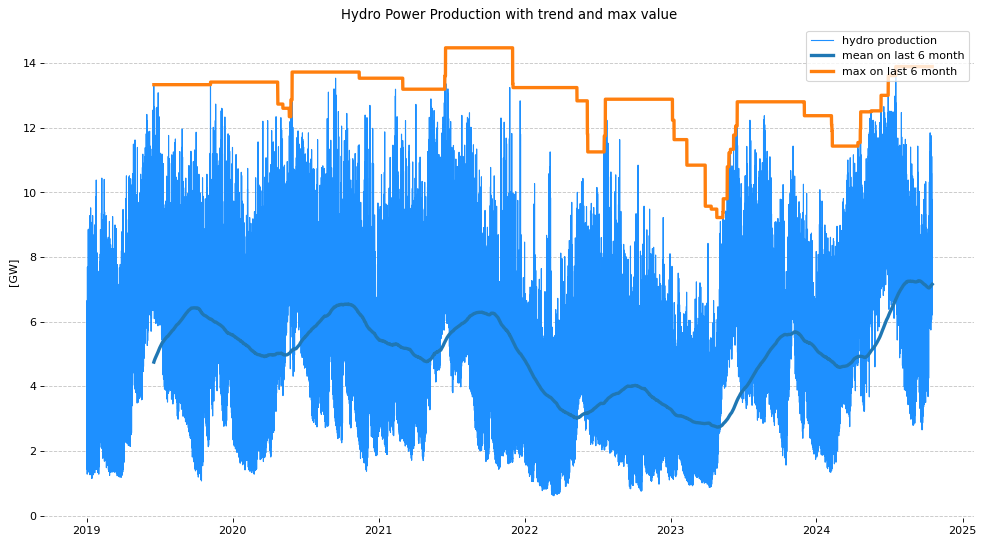

In [18]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(hydro["HYDRO_GWH"], linewidth=1, label = 'hydro production', color = 'dodgerblue') 
ax.plot(hydro["HYDRO_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=3, label = 'mean on last 6 month') 
ax.plot(hydro["HYDRO_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=3, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Hydro Power Production with trend and max value"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Photovoltaic production

In [19]:
solar 

,SOLAR_GWH
ORAINI,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,0.0
...,...
2024-10-16 19:00:00,0.0
2024-10-16 20:00:00,0.0
2024-10-16 21:00:00,0.0


In [20]:
print("Macro-scale descriptive stats: SOLAR")
print(solar["SOLAR_GWH"].describe(),"\n")

Macro-scale descriptive stats: SOLAR
count    50778.000000
mean         2.510268
std          3.502565
min         -0.010000
25%          0.000000
50%          0.080000
75%          4.780000
max         15.190000
Name: SOLAR_GWH, dtype: float64 



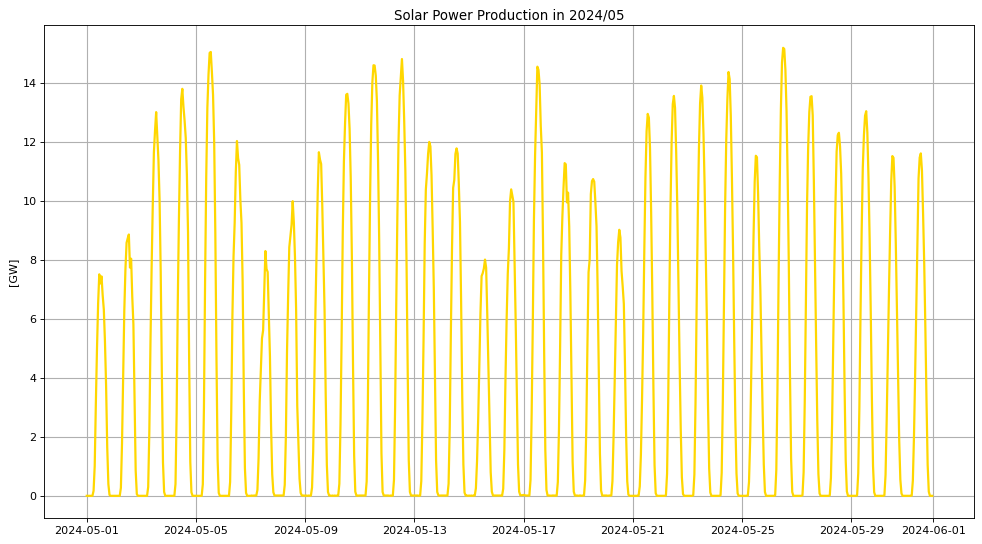

In [21]:
DPI = 80
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(solar["SOLAR_GWH"].loc["2024-05"], linewidth=2, color = 'gold') 

ax.set_title("Solar Power Production in 2024/05"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

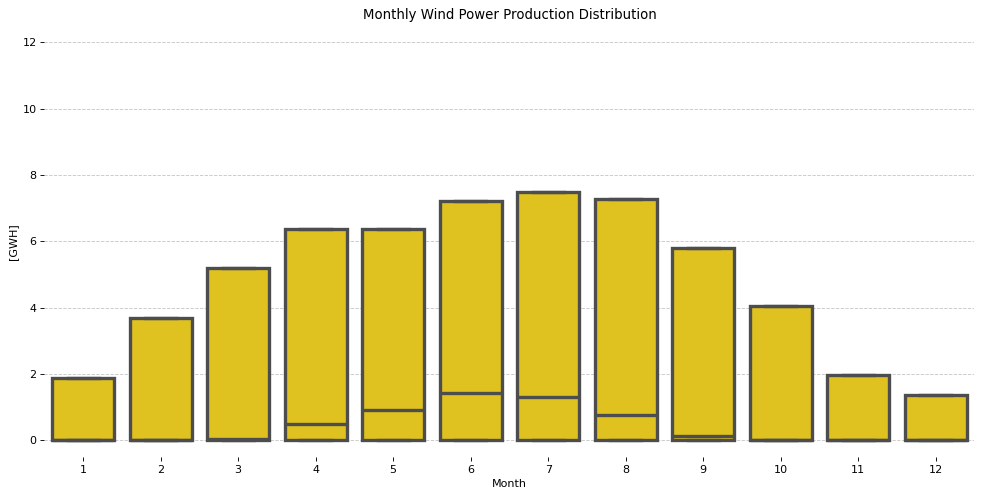

In [22]:
solar_copy = solar.copy()
solar_copy.loc[:, 'hour'] = solar_copy.index.hour
solar_copy.loc[:, 'month'] = solar_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=solar_copy, x='month', y='SOLAR_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = 'gold')
ax.set_xlabel("Month"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Wind Power Production Distribution")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_ylim(-0.5, 12.5)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5> Trends in solar </h5>

I use a rolling window of six months

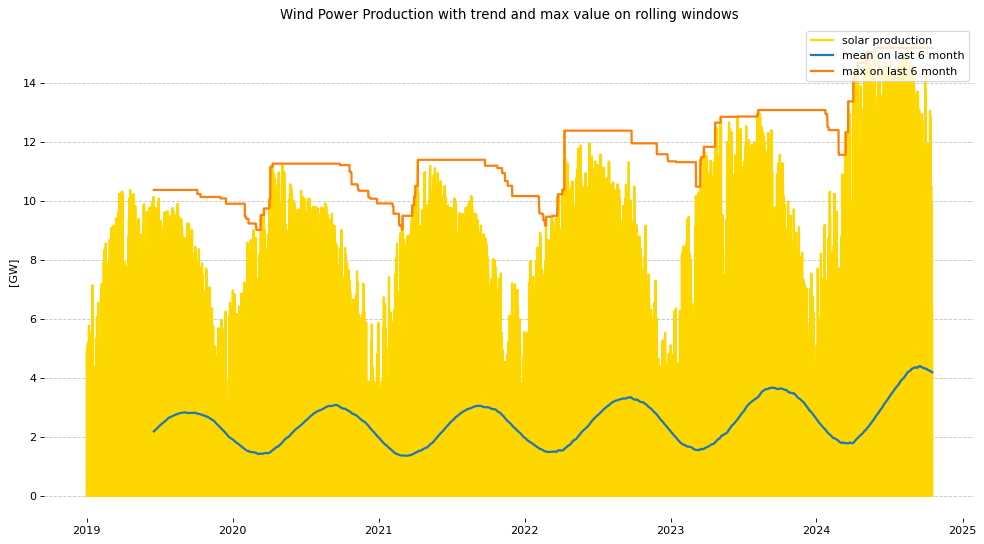

In [23]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(solar["SOLAR_GWH"], linewidth=2, label = 'solar production', color = 'gold') 
ax.plot(solar["SOLAR_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(solar["SOLAR_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Wind Power Production with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()

### Geothermal production

In [24]:
print("Macro-scale descriptive stats: GEO")
print(geothermal["GEO_GWH"].describe(),"\n")

Macro-scale descriptive stats: GEO
count    50778.000000
mean         0.626899
std          0.025807
min          0.470000
25%          0.610000
50%          0.630000
75%          0.650000
max          0.680000
Name: GEO_GWH, dtype: float64 



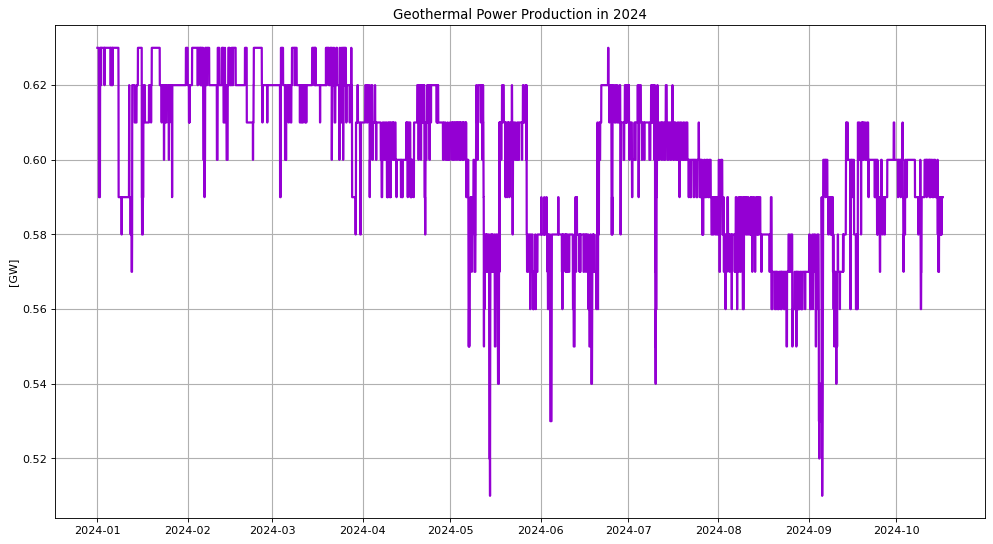

In [25]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(geothermal["GEO_GWH"].loc["2024"], linewidth=2, color = 'darkviolet') 

ax.set_title("Geothermal Power Production in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

### Net Foreign exchange


In [26]:
print("Macro-scale descriptive stats: FOREX")
print(forex["FOREX_GWH"].describe(),"\n")

Macro-scale descriptive stats: FOREX
count    50778.000000
mean         4.886896
std          2.181063
min         -4.940000
25%          3.710000
50%          5.190000
75%          6.320000
max         11.260000
Name: FOREX_GWH, dtype: float64 



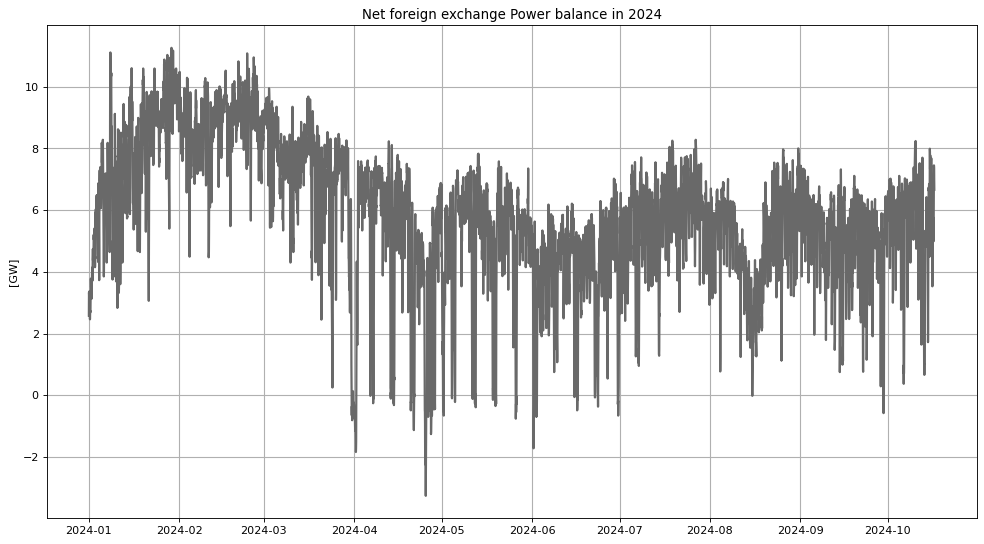

In [27]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(forex["FOREX_GWH"].loc["2024"], linewidth=2, color = 'dimgray') 

ax.set_title("Net foreign exchange Power balance in 2024"); ax.set_ylabel("[GW]")
ax.grid(True, which='both',  linewidth=1)
plt.show()

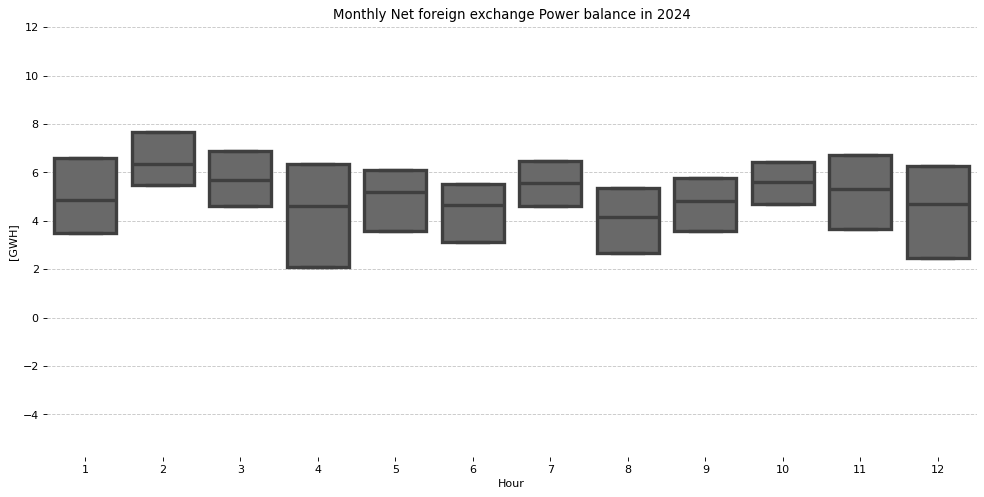

In [28]:
forex_copy = forex.copy()
forex_copy.loc[:, 'hour'] = forex_copy.index.hour
forex_copy.loc[:, 'month'] = forex_copy.index.month

fig, ax = plt.subplots(figsize=(15, 7), dpi=DPI)
sns.boxplot(data=forex_copy, x='month', y='FOREX_GWH', fliersize=0, whis=0, linewidth=3, ax=ax, color = 'dimgray')
ax.set_xlabel("Hour"); ax.set_ylabel("[GWH]")
ax.set_title("Monthly Net foreign exchange Power balance in 2024")
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

<h5> Trends in Foreign exchange </h5>
I use a rolling window of six months

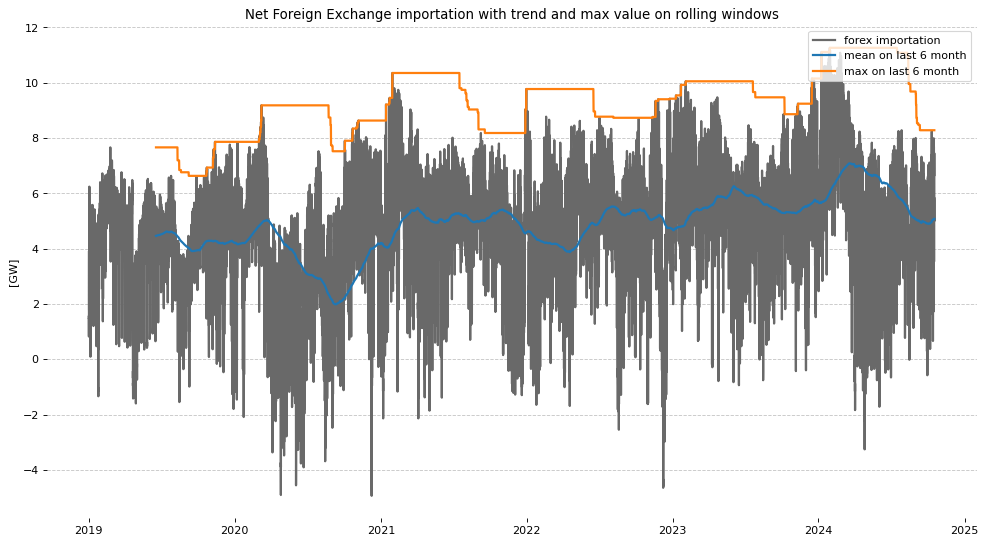

In [29]:
fig, ax = plt.subplots(figsize=[15,8], dpi=DPI)
ax.plot(forex["FOREX_GWH"], linewidth=2, label = 'forex importation', color = 'dimgray') 
ax.plot(forex["FOREX_GWH"].rolling(24*7*4*6, center=False).mean(), linewidth=2, label = 'mean on last 6 month') 
ax.plot(forex["FOREX_GWH"].rolling(24*7*4*6, center=False).max(), linewidth=2, label = 'max on last 6 month') 
# Hide specific plot spines
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_title("Net Foreign Exchange importation with trend and max value on rolling windows"); ax.set_ylabel("[GW]")
ax.legend(loc='upper right')
plt.show()